<a href="https://colab.research.google.com/github/Saumibhattacharya/Data-science/blob/master/Mini_Project_death_rate_due_to_heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the required libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Import the .csv file and convert it to a DataFrame

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.shape   #gives the rows vs column of the data

(299, 13)

In [4]:
df.head()     #prints top 5 rows of the dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


3. Take the input and output. Assign it in x and y respectively

In [5]:
# imput and output value
#x = df.iloc[:,0:13].values
#y = df.iloc[13].values
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

4. Split the data in training and testing values. (I have splitted it into 8:2 ratio)

In [6]:
# data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)

In [7]:
x_train.shape


(239, 12)

In [8]:
x_test.shape

(60, 12)

In [9]:
y_train.shape

(239,)

In [10]:
y_test.shape

(60,)

5. After splitting we need to normalize the data, as we can see the data is not normally distributed. And by doing normalization the fitting of model is better and also the accuracy score.

In [11]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_train

array([[0.18181818, 1.        , 0.01837203, ..., 0.        , 0.        ,
        0.64874552],
       [0.36363636, 0.        , 0.11150804, ..., 1.        , 0.        ,
        0.26523297],
       [0.54545455, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.87455197],
       ...,
       [0.50909091, 1.        , 0.1273284 , ..., 1.        , 0.        ,
        0.68458781],
       [0.12727273, 0.        , 0.07131921, ..., 1.        , 0.        ,
        0.69892473],
       [0.2       , 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.85304659]])

6. After normalization model fitting and prediction is done by classifier. I have used KNN for this dataset

In [13]:
#model fitting and prediction
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 17)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [14]:
print(y_test)

210    0
217    1
28     1
117    0
131    0
293    0
72     1
238    0
61     1
98     0
197    0
109    0
163    1
250    0
242    0
275    0
247    0
177    0
277    0
189    0
215    0
93     1
287    0
62     0
89     0
240    0
261    0
245    0
170    0
47     1
53     1
156    0
107    0
90     0
20     0
83     0
267    0
7      1
110    1
16     1
164    1
166    0
236    0
32     1
148    1
104    0
34     1
92     0
200    0
63     1
102    0
294    0
29     1
129    0
160    0
0      1
221    0
24     1
270    0
122    0
Name: DEATH_EVENT, dtype: int64


7. Evaluation Scores:
   a) Accurracy Score
   b) Confusion matrix
   c) Classification report

In [15]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

75.0

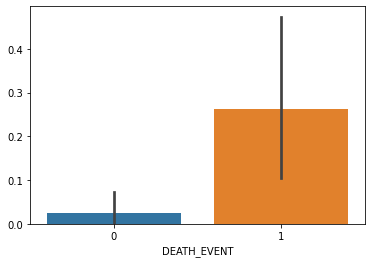

In [17]:
plt.figure()
sns.barplot(y_test,y_pred)
plt.show()

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[40,  1],
       [14,  5]])

In [19]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        41
           1       0.83      0.26      0.40        19

    accuracy                           0.75        60
   macro avg       0.79      0.62      0.62        60
weighted avg       0.77      0.75      0.70        60



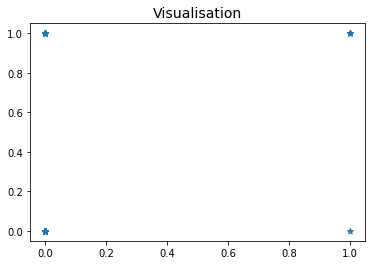

In [39]:
plt.figure()
plt.title("Visualisation", fontsize = 14)
plt.scatter(y_pred,y_test, marker= '*')
plt.show()

***INFERENCE***

By observing the confusion matrix we can see that True Negative and False Postive values are good but True positive and False Negative values can be imporved. PLus from classification matrix we can say it is not working properly for recall values for death rate.
Overall, the model is good as the accuracy is 75%. 